In [1]:
import sys
sys.path.append('Scripts')
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from utils import path, generate_time_series
from sklearn import preprocessing
import os
import gc

from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField

def read_data(dataframe):
    return pd.read_csv(dataframe['path'], names = range(1, 16+1), dtype = float)

Gramian Angular Field Script

In [2]:
dataType = '512'
method = 'Simple'
methodDict = {
    'Simple': ['Dados_BCI_Combinados', 'GAF_Combinados', 'Combined_'],
    'PCA': ['Dados_BCI_CombinadosPCA', 'GAF_PCA', 'PCA_'],
    'Processed': ['ProcessedSignals', 'GAF_ProcessedSignals', 'Processed_']
}
dataPath = path('C:\\Users\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\'+methodDict[method][0]+'\\'+dataType)
# figPath = path('C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\'+methodDict[method][1]+"\\"+dataType)
figPath = path('C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\0179520170504\\'+dataType)

data = pd.read_csv('SSVEPDataset'+methodDict[method][2]+dataType+".csv")
data = data.where(data['subject'] == 179520170504).dropna().reset_index()

gasf = GramianAngularField(image_size = 256, method = 'summation')
files = list(range(len(data)))
n = len(files)
x, y = 12, 12

# for i in range(2500, 2730):
#     sample = np.loadtxt(data.loc[i]['path']).reshape(1, -1)
#     if sample[0][1] != 0:
#         X = gasf.fit_transform(sample)
#         fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (x, y))
#         plt.axis('off')
#         im = ax.imshow(X[0], cmap = 'rainbow', origin = 'lower')

#         state = str(data.loc[i]['state'])
# #         subject = str(data.loc[i]['subject'])
#         subject = '0_'
#         if data.loc[i]['path'][-6] == '\\':
#             file = data.loc[i]['path'][-5]
#         else:
#             file = data.loc[i]['path'][-6:-4]

#         try:
#             fig.savefig(figPath()+'\\'+state+'\\'+subject+file+'_'+str(i)+".png", dpi = 200, bbox_inches = 'tight')
#             plt.close()
#         except:
#             print("Error creating picture: {}".format(figPath()+'\\'+state+'\\0_'+file+".png"))

In [3]:
for i in range(0, 525):
    sample = np.loadtxt(data.loc[i]['path']).reshape(1, -1)
    if sample[0][1] != 0:
        X = gasf.fit_transform(sample)
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (x, y))
        plt.axis('off')
        im = ax.imshow(X[0], cmap = 'rainbow', origin = 'lower')

        state = str(int(data.loc[i]['state']))
#         subject = str(data.loc[i]['subject'])
        subject = '0_'
        if data.loc[i]['path'][-6] == '\\':
            file = data.loc[i]['path'][-5]
        else:
            file = data.loc[i]['path'][-6:-4]

        try:
            fig.savefig(figPath()+'\\'+state+'\\'+subject+file+'_'+str(i)+".png", dpi = 200, bbox_inches = 'tight')
            plt.close()
        except:
            print("Error creating picture: {}".format(figPath()+'\\'+state+'\\0_'+file+".png"))

In [3]:
n

525

***

Example

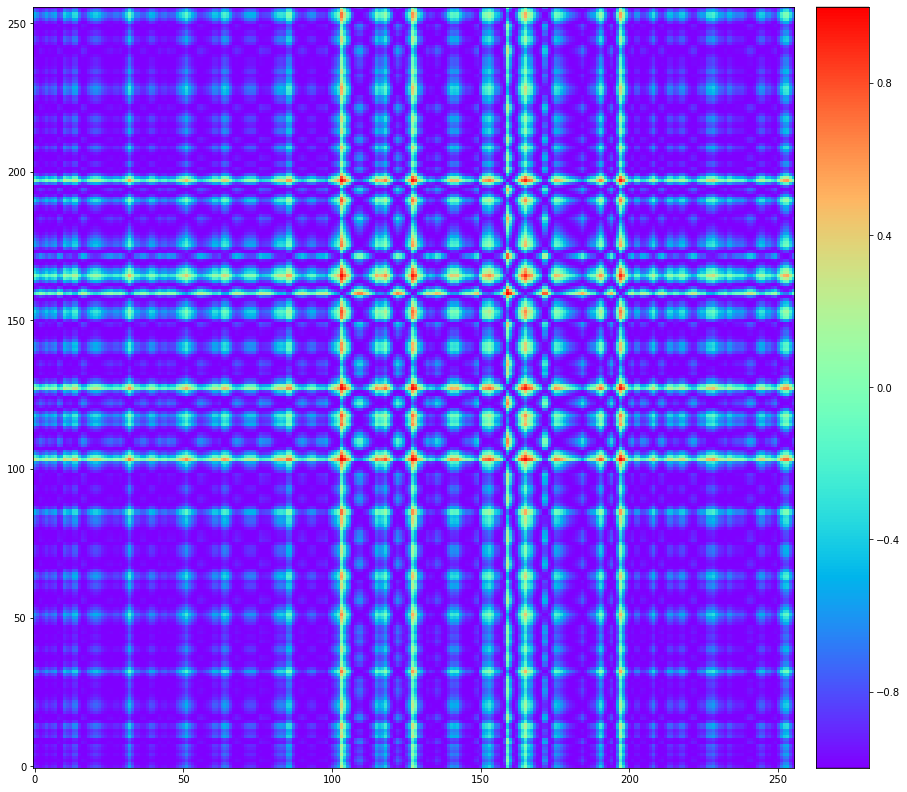

In [3]:
# sample = generate_time_series(theta = 0.1, frequency = 5).reshape(1, -1)
sample = np.loadtxt(data.loc[0]['path']).reshape(1, -1)
gasf = GramianAngularField(image_size = 256, method = 'summation')
X_gasf = gasf.fit_transform(sample)

fig = plt.figure(figsize = (24, 14))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 1),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )

for ax in grid:
    im = ax.imshow(X_gasf[0], cmap = 'rainbow', origin = 'lower')

ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.show()

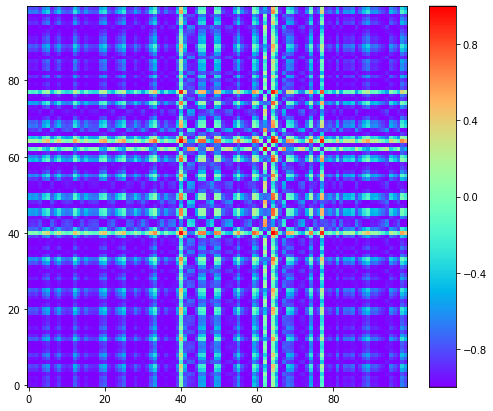

In [19]:
# sample = generate_time_series(theta = 0.1, frequency = 5).reshape(1, -1)
sample = np.loadtxt(data.loc[0]['path']).reshape(1, -1)
gasf = GramianAngularField(image_size = 100, method = 'summation')
X_gasf = gasf.fit_transform(sample)

fig = plt.figure(figsize = (12, 7))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 1),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )

for ax in grid:
    im = ax.imshow(X_gasf[0], cmap = 'rainbow', origin = 'lower')

ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.show()

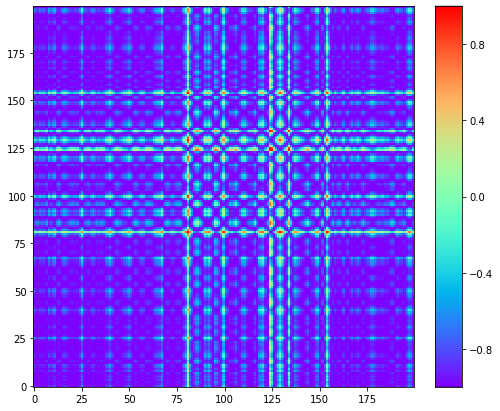

In [20]:
# sample = generate_time_series(theta = 0.1, frequency = 5).reshape(1, -1)
sample = np.loadtxt(data.loc[0]['path']).reshape(1, -1)
gasf = GramianAngularField(image_size = 200, method = 'summation')
X_gasf = gasf.fit_transform(sample)

fig = plt.figure(figsize = (12, 7))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 1),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )

for ax in grid:
    im = ax.imshow(X_gasf[0], cmap = 'rainbow', origin = 'lower')

ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.show()

In [50]:
sample.shape

(1, 512)

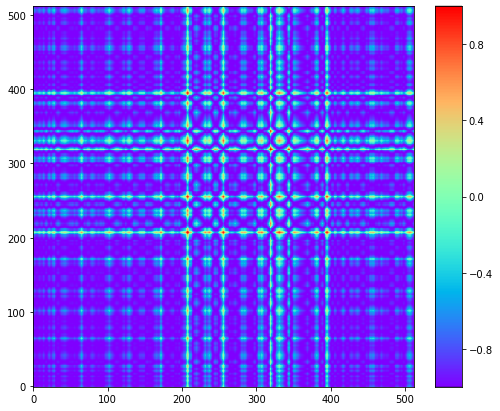

In [51]:
# sample = generate_time_series(theta = 0.1, frequency = 5).reshape(1, -1)
sample = np.loadtxt(data.loc[0]['path']).reshape(1, -1)
gasf = GramianAngularField(image_size = 512, method = 'summation')
X_gasf = gasf.fit_transform(sample)

fig = plt.figure(figsize = (12, 7))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 1),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )

for ax in grid:
    im = ax.imshow(X_gasf[0], cmap = 'rainbow', origin = 'lower')

ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.show()

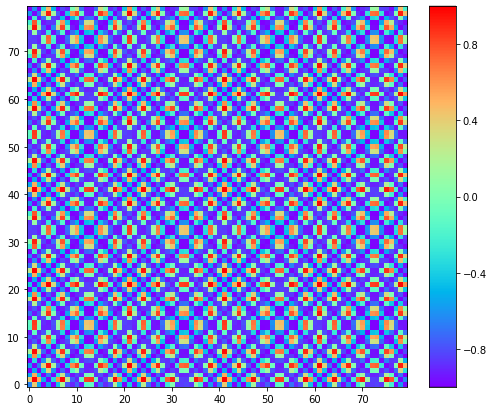

In [30]:
sample = generate_time_series(theta = 0.1, frequency = 14).reshape(1, -1)
# sample = np.loadtxt(data.loc[0]['path']).reshape(1, -1)
gasf = GramianAngularField(image_size = 80, method = 'summation')
X_gasf = gasf.fit_transform(sample)

fig = plt.figure(figsize = (12, 7))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 1),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )

for ax in grid:
    im = ax.imshow(X_gasf[0], cmap = 'rainbow', origin = 'lower')

ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.show()

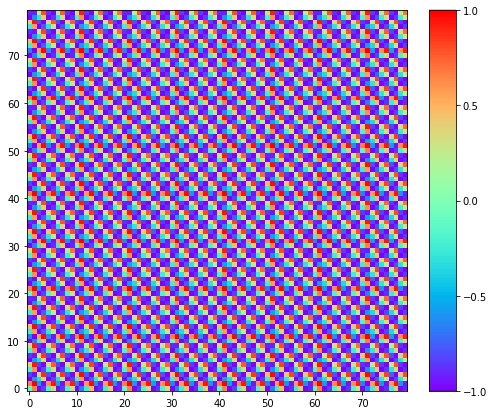

In [16]:
fig = plt.figure(figsize = (12, 7))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 1),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )

for ax in grid:
    im = ax.imshow(X_gasf[0], cmap = 'rainbow', origin = 'lower')

ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.show()

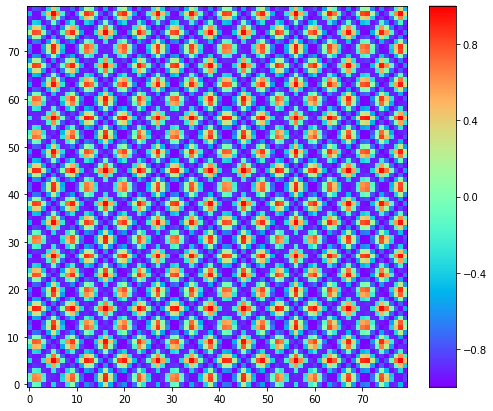

In [28]:
fig = plt.figure(figsize = (12, 7))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 1),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )

for ax in grid:
    im = ax.imshow(X_gasf[0], cmap = 'rainbow', origin = 'lower')

ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.show()